# Network Times Plotting

Logs are provided in `logs`, captured from client.

In [1]:
import os
os.chdir(f'{os.getcwd()}/../../')
WORKING_DIR = './evaluation/profile_networking'

In [2]:
import glob
import pandas
import imageio
import numpy as np
import pandas as pd
from tqdm import tqdm

import seaborn as sns
from matplotlib import pyplot as plt
sns.set(color_codes=True)

In [3]:
df_all = []

In [4]:
for i, c in enumerate(['campus_wifi', 'resident', 'lte']):
    df_ipad = pd.read_csv(f'{WORKING_DIR}/new_logs/multi_network/{c}_2/ipad.csv')
    df_iphone = pd.read_csv(f'{WORKING_DIR}/new_logs/multi_network/{c}_2/iphone.csv')
    df_mac = pd.read_csv(f'{WORKING_DIR}/new_logs/multi_network/{c}_2/macbook_pro_15.csv')

    df_ipad['device'] = 'ipad'
    df_iphone['device'] = 'iphone'
    df_mac['device'] = 'mac'
    
    df_ipad['network_condition'] = f'{i}.{c}'
    df_iphone['network_condition'] = f'{i}.{c}'
    df_mac['network_condition'] = f'{i}.{c}'

    df_all += [df_ipad, df_iphone, df_mac]

In [5]:
df = pd.concat(df_all)

## Figure 9

- n_anchors = 1280
- encoding = EncodeProbeBufferCPUOptimizedStriped
- x = num of estimation positions
- y = network time
- hue = network condition

subfigures = device

In [6]:
df.query('n_anchors == 1280 & encoding == "EncodeProbeBufferCPUOptimizedStriped" & device == "ipad"').groupby(
    ['n_anchors', 'encoding', 'n_uspc', 'network_condition'], as_index=False).median()

,n_anchors,encoding,n_uspc,network_condition,data_idx,network_time
0,1280,EncodeProbeBufferCPUOptimizedStriped,1,0.campus_wifi,1018,8
1,1280,EncodeProbeBufferCPUOptimizedStriped,1,1.resident,1018,50
2,1280,EncodeProbeBufferCPUOptimizedStriped,1,2.lte,1018,77
3,1280,EncodeProbeBufferCPUOptimizedStriped,2,0.campus_wifi,1018,8
4,1280,EncodeProbeBufferCPUOptimizedStriped,2,1.resident,1018,52
5,1280,EncodeProbeBufferCPUOptimizedStriped,2,2.lte,1018,80
6,1280,EncodeProbeBufferCPUOptimizedStriped,4,0.campus_wifi,1018,9
7,1280,EncodeProbeBufferCPUOptimizedStriped,4,1.resident,1018,57
8,1280,EncodeProbeBufferCPUOptimizedStriped,4,2.lte,1018,81


<ipython-input-10-0f7edb30ee44>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2).astype(np.int), size=16)


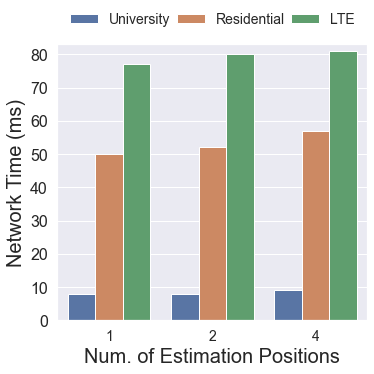

In [10]:
plt.figure(figsize=(5, 5))


t = df.query('n_anchors == 1280 & encoding == "EncodeProbeBufferCPUOptimizedStriped" & device == "ipad"').groupby(
    ['n_anchors', 'encoding', 'n_uspc', 'network_condition'], as_index=False).median()
ax = sns.barplot(data=t, x='n_uspc', y='network_time', hue='network_condition')

ax.set_xlabel('Num. of Estimation Positions', fontsize=20)
ax.set_ylabel('Network Time (ms)', fontsize=20)


l = ax.legend(
    loc='lower center', fontsize=14, ncol=3,
    bbox_to_anchor=(0., 1.02, 1., .102), mode='expand',
    edgecolor=(0, 0, 0, 0),
    facecolor=(0, 0, 1, 0.0)
)
l.get_frame().set_alpha(None)
l.texts[0].set_text('University')
l.texts[1].set_text('Residential')
l.texts[2].set_text('LTE')


# plt.setp(ax.get_legend().get_texts(), fontsize='11') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title

ax.set_ylim(0, 83)
ax.set_xticklabels([1, 2, 4], size=14)
ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2).astype(np.int), size=16)

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/xihe_network_ipad.pdf')

In [11]:
df.query('n_anchors == 1280 & encoding == "EncodeProbeBufferCPUOptimizedStriped" & device == "iphone"').groupby(
    ['n_anchors', 'encoding', 'n_uspc', 'network_condition'], as_index=False).median()

,n_anchors,encoding,n_uspc,network_condition,data_idx,network_time
0,1280,EncodeProbeBufferCPUOptimizedStriped,1,0.campus_wifi,1018,7
1,1280,EncodeProbeBufferCPUOptimizedStriped,1,1.resident,1018,50
2,1280,EncodeProbeBufferCPUOptimizedStriped,1,2.lte,1018,63
3,1280,EncodeProbeBufferCPUOptimizedStriped,2,0.campus_wifi,1018,8
4,1280,EncodeProbeBufferCPUOptimizedStriped,2,1.resident,1018,53
5,1280,EncodeProbeBufferCPUOptimizedStriped,2,2.lte,1018,68
6,1280,EncodeProbeBufferCPUOptimizedStriped,4,0.campus_wifi,1018,12
7,1280,EncodeProbeBufferCPUOptimizedStriped,4,1.resident,1018,59
8,1280,EncodeProbeBufferCPUOptimizedStriped,4,2.lte,1018,71


<ipython-input-14-552d0083e25e>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2).astype(np.int), size=16)


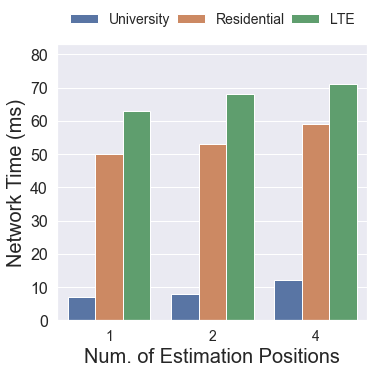

In [14]:
plt.figure(figsize=(5, 5))


t = df.query('n_anchors == 1280 & encoding == "EncodeProbeBufferCPUOptimizedStriped" & device == "iphone"').groupby(
    ['n_anchors', 'encoding', 'n_uspc', 'network_condition'], as_index=False).median()
ax = sns.barplot(data=t, x='n_uspc', y='network_time', hue='network_condition')

ax.set_xlabel('Num. of Estimation Positions', fontsize=20)
ax.set_ylabel('Network Time (ms)', fontsize=20)


l = ax.legend(
    loc='lower center', fontsize=14, ncol=3,
    bbox_to_anchor=(0., 1.02, 1., .102), mode='expand',
    edgecolor=(0, 0, 0, 0),
    facecolor=(0, 0, 1, 0.0)
)
l.get_frame().set_alpha(None)
l.texts[0].set_text('University')
l.texts[1].set_text('Residential')
l.texts[2].set_text('LTE')


# plt.setp(ax.get_legend().get_texts(), fontsize='11') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title

ax.set_ylim(0, 83)
ax.set_xticklabels([1, 2, 4], size=14)
ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2).astype(np.int), size=16)

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/xihe_network_iphone.pdf')

In [15]:
df.query('n_anchors == 1280 & encoding == "EncodeProbeBufferCPUOptimizedStriped" & device == "mac"').groupby(
    ['n_anchors', 'encoding', 'n_uspc', 'network_condition'], as_index=False).median()

,n_anchors,encoding,n_uspc,network_condition,data_idx,network_time
0,1280,EncodeProbeBufferCPUOptimizedStriped,1,0.campus_wifi,1018,7
1,1280,EncodeProbeBufferCPUOptimizedStriped,1,1.resident,1018,45
2,1280,EncodeProbeBufferCPUOptimizedStriped,1,2.lte,1018,77
3,1280,EncodeProbeBufferCPUOptimizedStriped,2,0.campus_wifi,1018,10
4,1280,EncodeProbeBufferCPUOptimizedStriped,2,1.resident,1018,49
5,1280,EncodeProbeBufferCPUOptimizedStriped,2,2.lte,1018,80
6,1280,EncodeProbeBufferCPUOptimizedStriped,4,0.campus_wifi,1018,13
7,1280,EncodeProbeBufferCPUOptimizedStriped,4,1.resident,1018,56
8,1280,EncodeProbeBufferCPUOptimizedStriped,4,2.lte,1018,85


<ipython-input-17-70dc8141ac5c>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2).astype(np.int), size=16)


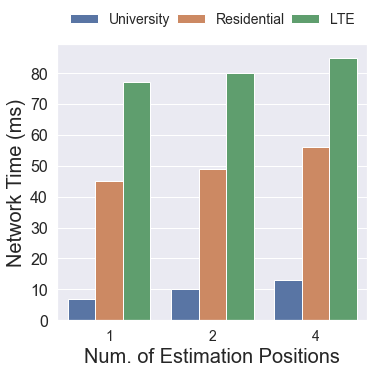

In [17]:
plt.figure(figsize=(5, 5))

t = df.query('n_anchors == 1280 & encoding == "EncodeProbeBufferCPUOptimizedStriped" & device == "mac"').groupby(
    ['n_anchors', 'encoding', 'n_uspc', 'network_condition'], as_index=False).median()
ax = sns.barplot(data=t, x='n_uspc', y='network_time', hue='network_condition')

ax.set_xlabel('Num. of Estimation Positions', fontsize=20)
ax.set_ylabel('Network Time (ms)', fontsize=20)


l = ax.legend(
    loc='lower center', fontsize=14, ncol=3,
    bbox_to_anchor=(0., 1.02, 1., .102), mode='expand',
    edgecolor=(0, 0, 0, 0),
    facecolor=(0, 0, 1, 0.0)
)
l.get_frame().set_alpha(None)
l.texts[0].set_text('University')
l.texts[1].set_text('Residential')
l.texts[2].set_text('LTE')


# plt.setp(ax.get_legend().get_texts(), fontsize='11') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title

ax.set_xticklabels([1, 2, 4], size=14)
ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2).astype(np.int), size=16)

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/xihe_network_mac.pdf')

## Figure 13

- device = macbook
- network_condition = 0.campus_wifi
- x = n_anchors
- y = network time
- hue = encoding method
- subfigures = n_uspc

<ipython-input-57-5a5303f34b66>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2).astype(np.int), size=16)


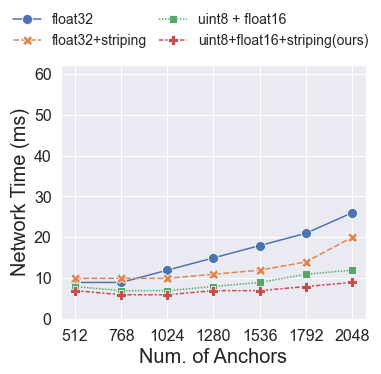

In [57]:
plt.figure(figsize=(5, 5))

t = df.query('device == "mac" & n_uspc == 1 & network_condition == "0.campus_wifi"').groupby(
    ['n_anchors', 'encoding', 'n_uspc', 'network_condition'], as_index=False).median()
ax = sns.lineplot(data=t, x='n_anchors', y='network_time', hue='encoding', style='encoding', markers=True, markersize=10)

ax.set_xlabel('Num. of Anchors', fontsize=20)
ax.set_ylabel('Network Time (ms)', fontsize=20)

l = ax.legend(
    loc='lower center', fontsize=14, ncol=2,
    bbox_to_anchor=(-0.2, 1.02, 1.25, .102), mode='expand',
    edgecolor=(0, 0, 0, 0),
    facecolor=(0, 0, 1, 0.0),
    labels=['float32', 'float32+striping', 'uint8+float16', 'uint8+float16+striping(ours)']
)
l.get_frame().set_alpha(None)

# plt.setp(ax.get_legend().get_texts(), fontsize='11') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title

ax.set_ylim([0, 62])
ax.set_xticks([512 + 256 * v for v in range(7)])
ax.set_xticklabels([512 + 256 * v for v in range(7)], size=16)
ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2).astype(np.int), size=16)

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/network_1_uspc.pdf')

<ipython-input-58-d4fd446b34e9>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2).astype(np.int), size=16)


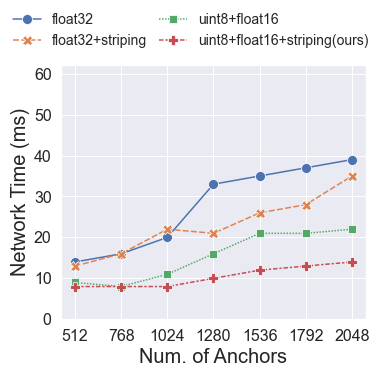

In [58]:
plt.figure(figsize=(5, 5))

t = df.query('device == "mac" & n_uspc == 2 & network_condition == "0.campus_wifi"').groupby(
    ['n_anchors', 'encoding', 'n_uspc', 'network_condition'], as_index=False).median()
ax = sns.lineplot(data=t, x='n_anchors', y='network_time', hue='encoding', style='encoding', markers=True, markersize=10)

ax.set_xlabel('Num. of Anchors', fontsize=20)
ax.set_ylabel('Network Time (ms)', fontsize=20)
l = ax.legend(
    loc='lower center', fontsize=14, ncol=2,
    bbox_to_anchor=(-0.2, 1.02, 1.25, .102), mode='expand',
    edgecolor=(0, 0, 0, 0),
    facecolor=(0, 0, 1, 0.0),
    labels=['float32', 'float32+striping', 'uint8+float16', 'uint8+float16+striping(ours)']
)
l.get_frame().set_alpha(None)

# plt.setp(ax.get_legend().get_texts(), fontsize='11') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title

ax.set_ylim([0, 62])
ax.set_xticks([512 + 256 * v for v in range(7)])
ax.set_xticklabels([512 + 256 * v for v in range(7)], size=16)
ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2).astype(np.int), size=16)

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/network_2_uspc.pdf')

<ipython-input-59-aab791a2ef30>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2).astype(np.int), size=16)


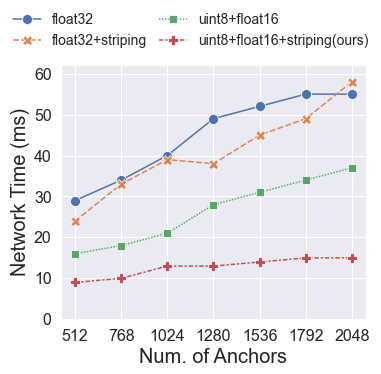

In [59]:
plt.figure(figsize=(5, 5))

t = df.query('device == "mac" & n_uspc == 4 & network_condition == "0.campus_wifi"').groupby(
    ['n_anchors', 'encoding', 'n_uspc', 'network_condition'], as_index=False).median()
ax = sns.lineplot(data=t, x='n_anchors', y='network_time', hue='encoding', style='encoding', markers=True, markersize=10)

ax.set_xlabel('Num. of Anchors', fontsize=20)
ax.set_ylabel('Network Time (ms)', fontsize=20)
l = ax.legend(
    loc='lower center', fontsize=14, ncol=2,
    bbox_to_anchor=(-0.2, 1.02, 1.25, .102), mode='expand',
    edgecolor=(0, 0, 0, 0),
    facecolor=(0, 0, 1, 0.0),
    labels=['float32', 'float32+striping', 'uint8+float16', 'uint8+float16+striping(ours)']
)
l.get_frame().set_alpha(None)

# plt.setp(ax.get_legend().get_texts(), fontsize='11') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title

ax.set_ylim([0, 62])
ax.set_xticks([512 + 256 * v for v in range(7)])
ax.set_xticklabels([512 + 256 * v for v in range(7)], size=16)
ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2).astype(np.int), size=16)

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/network_4_uspc.pdf')

<ipython-input-63-2fb2ce747b3b>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2).astype(np.int), size=16)


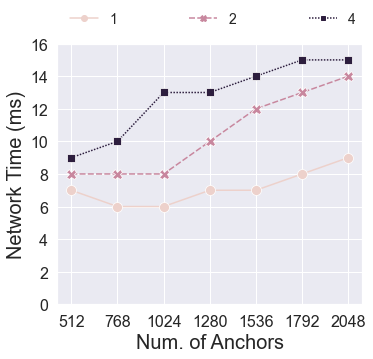

In [63]:
# figure 8 (b) 

plt.figure(figsize=(5, 4.8))

t = df.query('device == "mac" & encoding == "EncodeProbeBufferCPUOptimizedStriped" & network_condition == "0.campus_wifi"').groupby(
    ['n_anchors', 'encoding', 'n_uspc', 'network_condition'], as_index=False).median()
ax = sns.lineplot(data=t, x='n_anchors', y='network_time', hue='n_uspc', style='n_uspc', markers=True, markersize=10)

ax.set_xlabel('Num. of Anchors', fontsize=20)
ax.set_ylabel('Network Time (ms)', fontsize=20)
l = ax.legend(
    loc='lower center', fontsize=14, ncol=3,
    bbox_to_anchor=(0, 1.02, 1.02, .102), mode='expand',
    edgecolor=(0, 0, 0, 0),
    facecolor=(0, 0, 1, 0.0)
)
l.get_frame().set_alpha(None)

# plt.setp(ax.get_legend().get_texts(), fontsize='11') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title

ax.set_ylim([0, 16])
ax.set_xticks([512 + 256 * v for v in range(7)])
ax.set_xticklabels([512 + 256 * v for v in range(7)], size=16)
ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2).astype(np.int), size=16)

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/alb_estimation_positions.pdf')

In [44]:
t = df.query('device == "mac" & n_uspc == 1 & network_condition == "0.campus_wifi" & (encoding == "EncodeProbeBufferCPUFloat4" | encoding == "EncodeProbeBufferCPUOptimizedStriped")').groupby(
    ['n_anchors', 'encoding', 'n_uspc', 'network_condition'], as_index=False).median()
t[t['encoding'] == 'EncodeProbeBufferCPUFloat4']['network_time'].values / t[t['encoding'] == 'EncodeProbeBufferCPUOptimizedStriped']['network_time'].values

array([1.28571429, 1.5       , 2.        , 2.14285714, 2.57142857,
       2.625     , 2.88888889])

In [45]:
t = df.query('device == "mac" & n_uspc == 2 & network_condition == "0.campus_wifi" & (encoding == "EncodeProbeBufferCPUFloat4" | encoding == "EncodeProbeBufferCPUOptimizedStriped")').groupby(
    ['n_anchors', 'encoding', 'n_uspc', 'network_condition'], as_index=False).median()
t[t['encoding'] == 'EncodeProbeBufferCPUFloat4']['network_time'].values / t[t['encoding'] == 'EncodeProbeBufferCPUOptimizedStriped']['network_time'].values

array([1.75      , 2.        , 2.5       , 3.3       , 2.91666667,
       2.84615385, 2.78571429])

In [46]:
t = df.query('device == "mac" & n_uspc == 4 & network_condition == "0.campus_wifi" & (encoding == "EncodeProbeBufferCPUFloat4" | encoding == "EncodeProbeBufferCPUOptimizedStriped")').groupby(
    ['n_anchors', 'encoding', 'n_uspc', 'network_condition'], as_index=False).median()
t[t['encoding'] == 'EncodeProbeBufferCPUFloat4']['network_time'].values / t[t['encoding'] == 'EncodeProbeBufferCPUOptimizedStriped']['network_time'].values

array([3.22222222, 3.4       , 3.07692308, 3.76923077, 3.71428571,
       3.66666667, 3.66666667])